In [22]:
import os
from pathlib import Path
import torch
import matplotlib.pyplot as plt
import tqdm

In [23]:
mode = "train"
data_root = Path("data_prepared") / mode

In [24]:
all_videos = [os.path.join(data_root, name) for name in 
 os.listdir(data_root) if os.path.isdir(os.path.join(data_root, name))]

In [25]:
for video in tqdm.tqdm(all_videos):
    masks_old = torch.load(os.path.join(video, "mask.pt"))
    masks = torch.argmax(masks_old, dim=1).to(torch.uint8)

    assert torch.allclose(torch.argmax(masks_old, dim=1), masks.long())
    # masks_gt = torch.load(os.path.join(video, "mask_gt.pt"))
    # break
    torch.save(masks, os.path.join(video, "mask.pt"))

  0%|          | 0/1000 [00:00<?, ?it/s]

 25%|██▍       | 248/1000 [01:54<07:45,  1.62it/s]

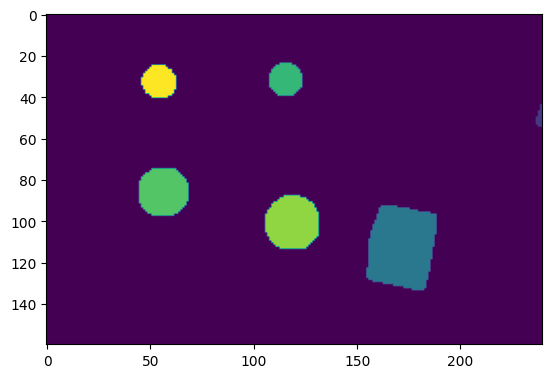

In [13]:
plt.imshow(masks[0])

In [17]:
torch.allclose(masks_gt[0], masks[0].long())

False